### Importar librerías

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Cargar Dataframe

In [120]:
df = pd.read_csv("https://raw.githubusercontent.com/opcruz/datasets/main/Weekly.csv", sep=",")
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [121]:
print('Tamaño de la muestra:', df.shape[0])

Tamaño de la muestra: 1089


### Información estadística

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000


Matriz de correlación entre los predictores

In [123]:
df.drop(columns=['Direction']).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Como se puede apreciar, los valores de correlación entre las variables **lag*** y **today** son cercanos a cero. Esto significa que parece haber poca correlación entre los rendimientos de hoy y los días anteriores. La única correlación importante es entre **Year** y **Volumen**.


In [124]:
df_down = df[df['Direction'] == 'Down']
df_up = df[df['Direction'] == 'Up']

Al graficar los datos, vemos que el volumen aumenta con el tiempo. En otras palabras, el número medio de acciones negociadas diariamente aumentó de 1990 a 2010.

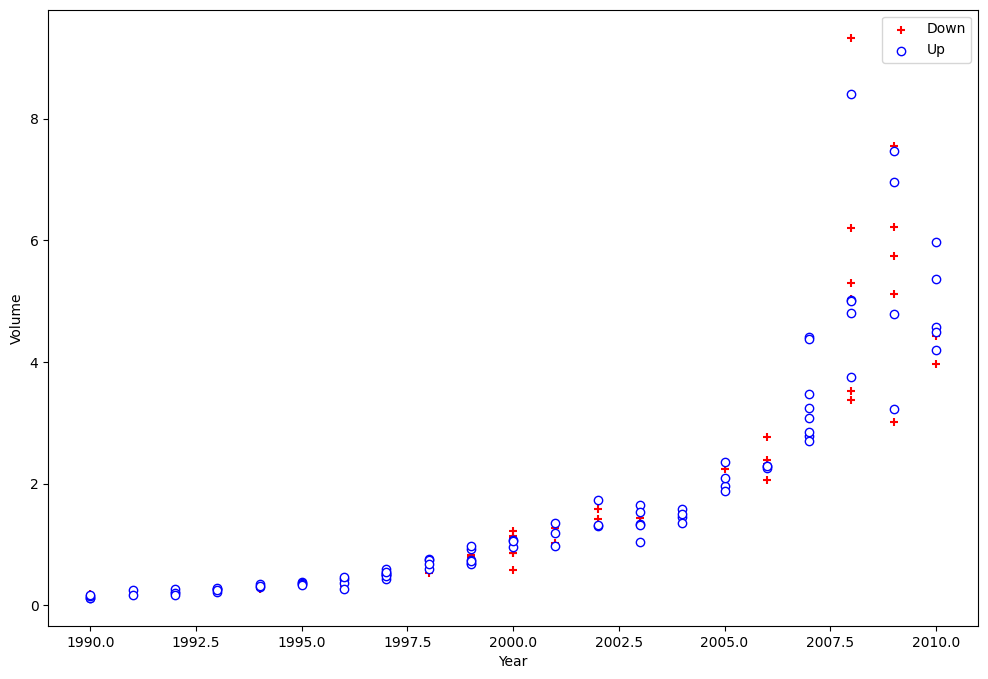

In [125]:
plt.figure(1, figsize=(12, 8))
# considerar una muestra aleatoria del 15 por ciento
df_down_15 = df_down.sample(frac=0.15)
df_up_15 = df_up.sample(frac=0.15)
plt.clf()  # clear figure
plt.xlabel('Year')
plt.ylabel('Volume')
plt.scatter(df_down_15['Year'], df_down_15['Volume'], color='red', marker='+', label="Down")
plt.scatter(df_up_15['Year'], df_up_15['Volume'], facecolors='white', edgecolors='blue', label="Up")
plt.legend()
plt.show()

In [126]:
df['direction_dummy'] = df['Direction'].factorize()[0]

In [127]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction_dummy
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


#### Dividir en conjunto de pruebas y entrenamiento

In [128]:
from sklearn.model_selection import train_test_split

# Entrenamiento: 80%
# Pruebas: 20%
train_set, test_set = train_test_split(df, test_size=0.20, stratify=df['direction_dummy'])

X_train = train_set[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X_test = test_set[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y_train = train_set[['direction_dummy']]
y_test = test_set[['direction_dummy']]

print("Datos originales:", df.shape[0])
print("Datos para el entrenamiento:", train_set.shape[0])
print("Datos para prueba:", test_set.shape[0])

Datos originales: 1089
Datos para el entrenamiento: 871
Datos para prueba: 218


### Aplicar regresión Logística

In [129]:
import sklearn.linear_model as sklearn

clf = sklearn.LogisticRegression(solver='newton-cg')

clf.fit(X_train.values, y_train.values.ravel())
print('Clases: ', clf.classes_)
print('Coeficientes: ', clf.coef_[0])
print('Intercepto :', clf.intercept_)


Clases:  [0 1]
Coeficientes:  [-0.02909359  0.08472986  0.00887061 -0.02954124 -0.00799551 -0.01672494]
Intercepto : [0.24041802]


In [130]:
y_pred = clf.predict(X_test.values)

### Matriz de confusión

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(cm)

Matriz de confusión:
[[ 18  79]
 [ 15 106]]


### Evaluar la precisión del modelo

In [132]:
accuracy = clf.score(X_test.values, y_test.values.ravel())
print('Precisión:', accuracy)

Precisión: 0.5688073394495413


In [133]:
 # Añadir una columna de unos para el término independiente
import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)

# Ajustar el modelo
model = sm.Logit(y_train, X_train1).fit()

# Imprimir los resultados
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.680758
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        direction_dummy   No. Observations:                  871
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            6
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                0.008989
Time:                        23:46:34   Log-Likelihood:                -592.94
converged:                       True   LL-Null:                       -598.32
Covariance Type:            nonrobust   LLR p-value:                   0.09619
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.097      2.476      0.013       0.050       0.431
Lag1          -0.0291      0.

In [134]:
from sklearn import metrics

decision_prob = 0.5

X_test = sm.add_constant(X_test)
predictions = model.predict(X_test) > decision_prob

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Coefficient of determination: %.5f' % metrics.r2_score(y_test, predictions))

Mean Absolute Error: 0.43119266055045874
Mean Squared Error: 0.43119266055045874
Root Mean Squared Error: 0.6566526178661429
Coefficient of determination: -0.74593


In [135]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

# calcular las métricas de evaluación de clasificación
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# imprimir las métricas
print('Accuracy:', accuracy)
print('AUC:', auc)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.5688073394495413
AUC: 0.530800034080259
Precision: 0.572972972972973
Recall: 0.8760330578512396


In [136]:
a = predictions > 0.5

### Matriz de confusión

In [137]:
decision_prob = 0.5
df_ = pd.DataFrame({'True default status': y_test.values.ravel(),
                    'Predicted default status': predictions > decision_prob})
df_.replace(to_replace={True: 1, False: 0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])

# df_.replace(to_replace={0:'Up', 1:'Down'}, inplace=True)
df_.replace(to_replace={1: 'Up', 0: 'Down'}, inplace=True)
df_.groupby(['Predicted default status', 'True default status']).size().unstack('True default status')

True default status,Down,Up
Predicted default status,,
Down,18,15
Up,79,106


In [138]:
p = y_test[y_test['direction_dummy'] == 0]
p1 = y_test[y_test['direction_dummy'] == 1]

In [139]:
df_.replace(to_replace={True: 1, False: 0}, inplace=True)
y_pred = np.asarray(df_['Predicted default status'])

df_.replace(to_replace={0: 'Up', 1: 'Down'}, inplace=True)
df_.groupby(['Predicted default status', 'True default status']).size().unstack('True default status')
precision_score(y, y_pred)
accuracy_score(y, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [5, 218]

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 0, 1, 1, 1])

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Generar conjunto de datos de prueba
X_test = np.linspace(0, 10, 1000).reshape(-1, 2)

# Obtener probabilidades estimadas para los datos de prueba
probs = lr.predict_proba(X_test)[:, 1]

# Graficar la curva de probabilidad estimada
plt.plot(X_test[:, 0], probs)
plt.xlabel('Variable independiente')
plt.ylabel('Probabilidad estimada')
plt.show()

Claro, aquí te dejo el código para obtener cada uno de los datos de salida de la regresión logística en Python utilizando la librería scikit-learn:

Coeficientes de la regresión:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Obtener coeficientes de la regresión
coef = lr.coef_

print('Coeficientes:', coef)
Intercepto:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Obtener intercepto
intercept = lr.intercept_

print('Intercepto:', intercept)
Probabilidades estimadas:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Generar conjunto de datos de prueba
X_test = [[1, 2], [3, 4], [5, 6]]

# Obtener probabilidades estimadas para los datos de prueba
probs = lr.predict_proba(X_test)

print('Probabilidades estimadas:', probs)
Clases predichas:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Generar conjunto de datos de prueba
X_test = [[1, 2], [3, 4], [5, 6]]

# Obtener clases predichas para los datos de prueba
preds = lr.predict(X_test)

print('Clases predichas:', preds)
Matriz de confusión:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Generar conjunto de datos de prueba
X_test = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y_test = [0, 0, 1, 1]

# Obtener matriz de confusión para los datos de prueba
preds = lr.predict(X_test)
cm = confusion_matrix(y_test, preds)

print('Matriz de confusión:')
print(cm)
Curva ROC:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Datos de ejemplo
X = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y = [0, 0, 1, 1]

# Crear objeto LogisticRegression
lr = LogisticRegression()

# Ajustar modelo a los datos de ejemplo
lr.fit(X, y)

# Generar conjunto de datos de prueba
X_test = [[0.5, 1], [2, 3], [4, 5], [6, 7]]
y_test = [0, 0, 1, 1]

# Obtener probabilidades estimadas para los datos de prueba
probs = lr.predict_proba(X_test)[:, 1]

# Obtener curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Graficar curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Tasa de falsos posit